# Geneva's Azimuth

In [23]:
#auto reload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
#imports
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from IPython.display import display, HTML, Image
import seaborn as sns

## Parameters

In [25]:
# File path
road_path = "/home/thibaud/Softwares/JupyterNotebook/Data Analysis/Geneva/csv/roads.csv"
pic_path = "/home/thibaud/Softwares/JupyterNotebook/Data Analysis/Geneva/csv/flickr_full.csv"

In [26]:
nb_dial = 60

In [27]:
# Polar visualization info 

# thetas angles = indice * bar size
thetadeg = np.arange(nb_dial)*360/nb_dial

# thetas = convert rad + rad 1/2 of a bar size
theta = thetadeg*(np.pi/180) + (360/nb_dial*(np.pi/180))/2

# rad of bar size
width = 360/nb_dial*(np.pi/180)

## Methods

In [28]:
# Print inline images
def Images(images, header=None, width="100%"): # to match Image syntax
    if type(width)==type(1): width = "{}px".format(width)
    html = ["<table style='width:{}'><tr>".format(width)]
    if header is not None:
        html += ["<th>{}</th>".format(h) for h in header] + ["</tr><tr>"]

    for image in images:
        html.append("<td><img src='{}' /></td>".format(image))
    html.append("</tr></table>")
    display(HTML(''.join(html)))

In [29]:
# Divided azimuths in X column array 
def azimuth_distribution360(df,x):
    arrayExit = np.zeros(x)
    for row in df.iterrows():
        if row[1]["azimuth"]==0:
            continue
        # get int of azimuth / 6
        addval = 1
        try:
            if not row[1]["oneway"] == "F":
                addval = 2
        except (KeyError):
            pass
        arrayExit[np.int8(row[1]["azimuth"]/(360/x))] += addval
    return arrayExit

# Get density for azim 
def azimuth_distribution180(df):
    arrayExit= []
    for i,azim in df.iteritems():
        if azim>180:
            azim = azim /2
        arrayExit.append(azim)
    return arrayExit

In [30]:
# Sum cosine calculation
def c_cal(thetas, angle="d"):
    s_cos_theta = 0 
    for i,t in thetas.iteritems():
        costhetas = np.cos(t) if angle=="r" else np.cos(t*np.pi/180)
        s_cos_theta += costhetas
    return s_cos_theta

# Sum sine calculation
def s_cal(thetas, angle="d"):
    s_sin_theta = 0 
    for i,t in thetas.iteritems():
        sinthetas = np.sin(t) if angle=="r" else np.sin(t*np.pi/180)
        s_sin_theta += sinthetas
    return s_sin_theta

# Mean Direction calculation
def mean_polar(cos_sum, sin_sum):
    if sin_sum > 0 and cos_sum > 0:
        return np.arctan(sin_sum/cos_sum) * 180/np.pi
    if cos_sum < 0:
        return (np.arctan(sin_sum/cos_sum) + np.pi) * 180/np.pi
    if sin_sum < 0 and cos_sum > 0:
        return (np.arctan(sin_sum/cos_sum) + 2 * np.pi) *180/np.pi    
    if sin_sum > 0 and cos_sum == 0:
        return np.pi/2 *180/np.pi
    if sin_sum < 0 and cos_sum == 0:
        return -np.pi/2 *180/np.pi

# R_bar calculation
def r_bar_cal(cos, sin, nb):
    return np.sqrt(np.power(sin, 2) + np.power(cos, 2))/nb

# Circular Variance calculation
def cvar_polar(r):
    return 1-r

# Angular Variance calculation
def avar_polar(r):
    return 2 * (1-r)

# Circular Standard Deviation calculation
def csd_polar(r):
    return np.sqrt(-2 * np.log(r)) *180/np.pi  

# Angular Deviation calculation
def ad_polar(r):
    return np.sqrt(2 * (1-r)) *180/np.pi  

# Roads network

### Data Mining


In [9]:
#Load csv into pandas
roads = pd.read_csv(road_path, delimiter=",")
print('road_n : ', roads["osm_id"].count())
roads.head()

road_n :  12005


,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,...,REVISION_Q,NAME_2,KANTONSNUM,ICC,EINWOHNERZ,BFS_NUMMER,GEM_TEIL,GEM_FLAECH,SHN,azimuth
0,4077020,5122,residential,Rue du 31 Décembre,NaN,B,30,0,F,F,...,2018_Aufbau,Gen�ve,25,CH,200548,6621,0,1830.0,CH25006621,134.083
1,4262531,5114,secondary,Avenue de Châtelaine,109.0,B,0,0,F,F,...,2018_Aufbau,Gen�ve,25,CH,200548,6621,0,1830.0,CH25006621,284.554
2,4272809,5114,secondary,Boulevard Georges-Favon,NaN,F,0,0,F,F,...,2018_Aufbau,Gen�ve,25,CH,200548,6621,0,1830.0,CH25006621,345.801
3,4272827,5122,residential,Rue du Vieux-Billard,NaN,F,0,0,F,F,...,2018_Aufbau,Gen�ve,25,CH,200548,6621,0,1830.0,CH25006621,103.588
4,4272833,5122,residential,Rue du Lac,NaN,F,30,0,F,F,...,2018_Aufbau,Gen�ve,25,CH,200548,6621,0,1830.0,CH25006621,135.326


In [10]:
roads_az = roads[roads["azimuth"] != 0]["azimuth"]

### Visualizations

##### Polar

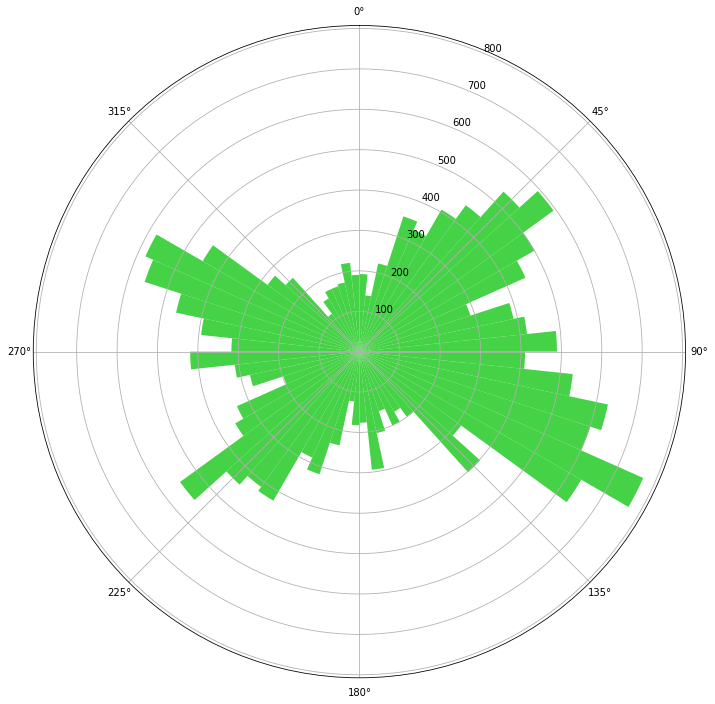

In [11]:
roads360 = azimuth_distribution360(roads,nb_dial)

# compass style
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

ax.bar(theta, roads360, width=width, bottom=0.0, color="limegreen", alpha=0.9)

fig= plt.gcf()
fig.set_size_inches(20, 12)
plt.grid(True)

plt.show()

##### Histogram 0 -> 2π

/home/thibaud/Softwares/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


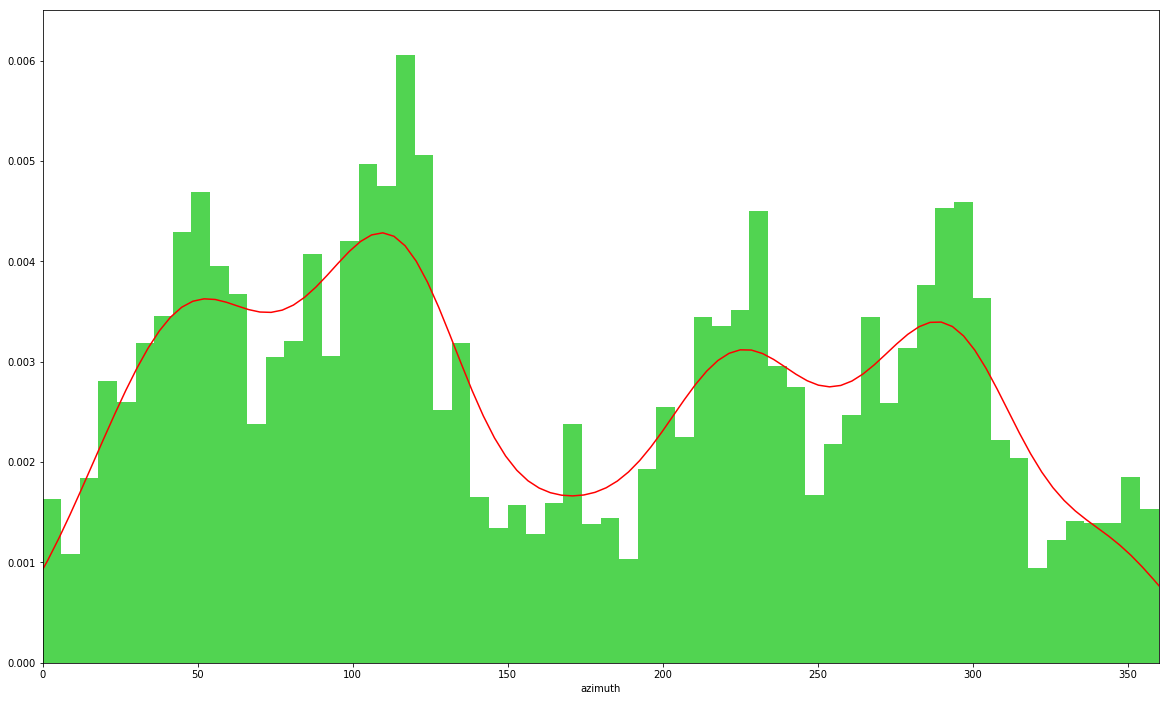

In [12]:
# Histogram projection and curve approximation
fig, ax = plt.subplots()

n, bins, patches = ax.hist(roads_az, 60, density=True, histtype='stepfilled', facecolor='limegreen', alpha=0.85)
sns.distplot(roads_az, color='r', hist=False, kde=True)

## setting the limits on the x-axis and y-axis
plt.xlim(0,360)
plt.ylim(0,0.0065)

fig.set_size_inches(20, 12)
plt.show()

##### Histogram 0 -> π

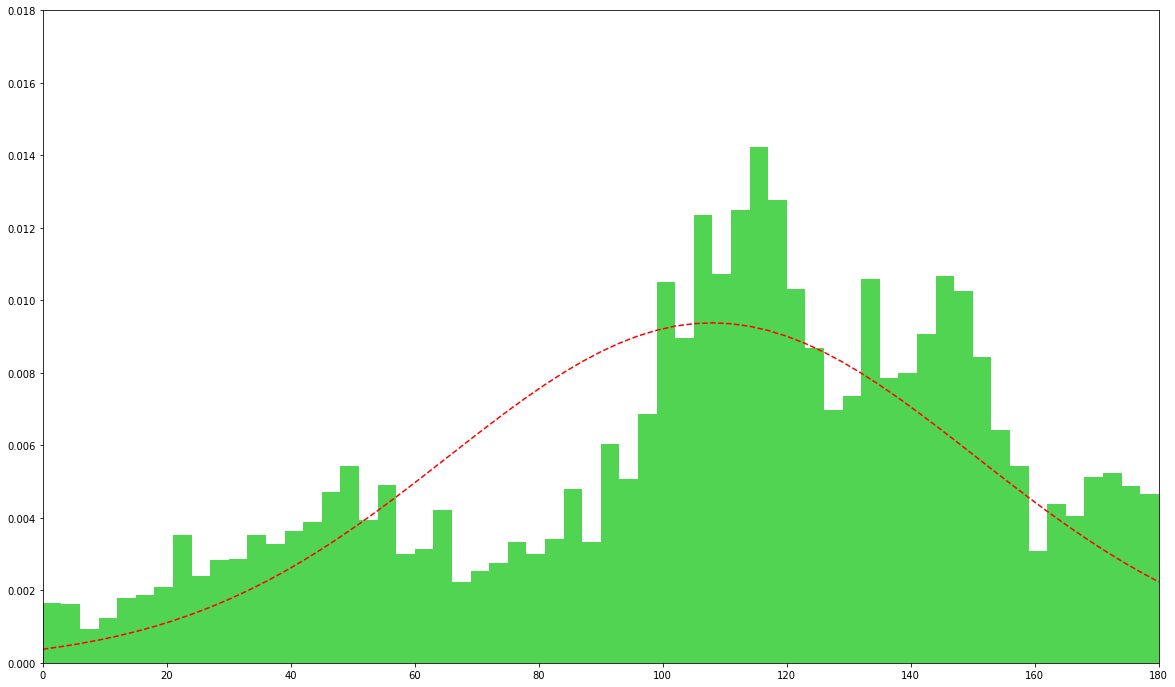

In [13]:
# Reprojection between 0 - π
roads180 = azimuth_distribution180(roads_az)

# Descriptive calculation 
mu_r = np.mean(roads180)  # mean of distribution
sigma_r = np.std(roads180)  # standard deviation of distribution
median_r = np.median(roads180)  # median of distribution

# Plot
fig, ax = plt.subplots()

n, bins_r, patches = ax.hist(roads180, 60, density=True, histtype='stepfilled', facecolor='limegreen', alpha=0.85)

# add a 'best fit' line
y_r = ((1 / (np.sqrt(2 * np.pi) * sigma_r)) *
     np.exp(-0.5 * (1 / sigma_r * (bins_r - mu_r))**2))
ax.plot(bins_r, y_r, '--', color='r',)

## setting the limits on the x-axis and y-axis
plt.xlim(0,180)
plt.ylim(0,0.018)
fig.set_size_inches(20, 12)

plt.show()

### Descriptive calculation

##### From 0 -> π

In [14]:
# Create Table
roads_descrip = pd.DataFrame({'Roads : 0 - π distribution':[mu_r, sigma_r, median_r]},
                       index = ['Mean', 'Variance', 'standard deviation'])
roads_descrip

,Roads : 0 - π distribution
Mean,107.948846
Variance,42.526262
standard deviation,114.323500


##### Polar description

In [15]:
sum_cos_r = c_cal(roads_az)
sum_sin_r = s_cal(roads_az)

mean_r = mean_polar(sum_cos_r,sum_sin_r)
r_bar_r = r_bar_cal(sum_cos_r, sum_sin_r, len(roads_az))

cvar_r = cvar_polar(r_bar_r)
avar_r = avar_polar(r_bar_r)
csd_r = csd_polar(r_bar_r)
ad_r = ad_polar(r_bar_r)

# Create Table
roads_descrip_polar = pd.DataFrame({'Roads : Polar description':[mean_r, r_bar_r, cvar_r, avar_r, csd_r, ad_r]},
                       index = ['Mean', 'R_bar', 'Circular Variance', 'Angular Variance', 'Circular Standard Deviation', 'Angular Deviation'])
roads_descrip_polar

,Roads : Polar description
Mean,96.573682
R_bar,0.075733
Circular Variance,0.924267
Angular Variance,1.848533
Circular Standard Deviation,130.164487
Angular Deviation,77.899782


# FlickR Pictures

### Data Mining

In [31]:
pics = pd.read_csv(pic_path, delimiter=",")
print('pics : ', pics["flickrid"].count())
pics.head()

pics :  463


,flickrid,owner_id,title,date_downl,date_shot,gps_bool,farm,server,secret,make,model,foc_mm,azimuth_bo,azimuth,height
0,23116328113,96818645@N04,NaN,2016-10-06,2015-05-08,1,1,585,NaN,Apple,iPhone 6,4.2,0,193.268156,410.968750
1,16190689184,112459783@N04,NaN,2016-10-06,2015-03-09,1,9,8727,NaN,Apple,iPhone 6,4.2,0,136.302306,418.600000
2,21594463858,23182635@N05,AAA 15-07-11 150224 - Le Sorelle Kessler,2016-10-06,2015-07-11,1,1,675,NaN,Apple,iPhone 6,4.2,0,83.547401,374.346875
3,20563203171,69108079@N07,NaN,2016-10-06,2015-07-31,1,6,5718,NaN,Apple,iPhone 5s,4.2,0,96.937985,373.146998
4,20370000229,69108079@N07,NaN,2016-10-06,2015-07-31,1,6,5636,NaN,Apple,iPhone 6 Plus,4.2,0,75.925754,374.552941


### Visualizations

##### Polar

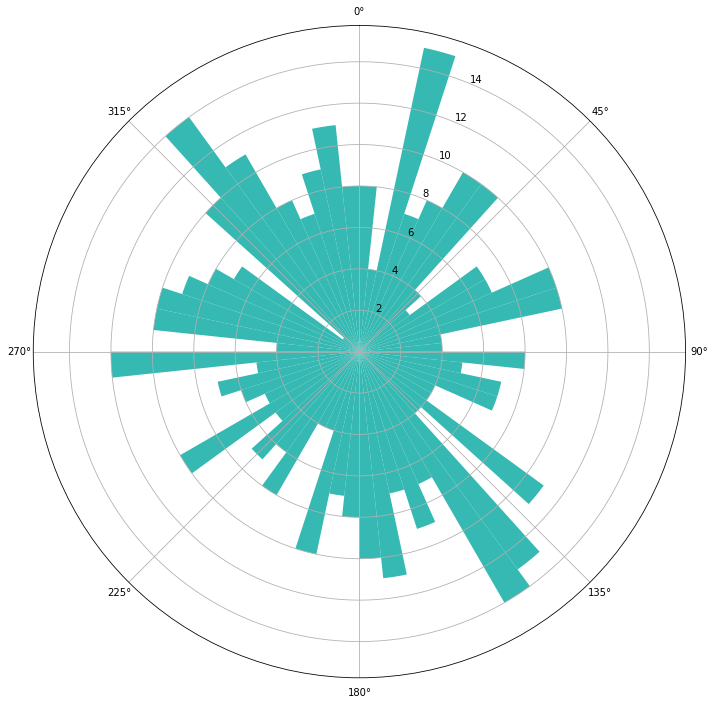

In [32]:
dialpics = azimuth_distribution360(pics,nb_dial)

# compass style
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

ax.bar(theta, dialpics, width=width, bottom=0.0, color="lightseagreen", alpha=0.9)

fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.grid(True)

plt.show()

In [22]:
# get i max 
maxs_i = dialpics.argsort()[-3:][::-1]

# get angles of i max
angles = []
for m_i in maxs_i:
    angles.append(360 * m_i / 60)
    
ids = []
for ang in angles:
    ids.append(pics[(ang < pics["azimuth"]) & (pics["azimuth"] < ang+6)]["flickrid"].sample(3))
    
print(angles)

for id in ids:
    filenames=[]
    for i in id:
        filenames.append("img/geneva/"+str(i)+".jpg")
    Images(filenames, width="100%")

[12.0, 318.0, 144.0]


,,


,,


,,


##### Histogram 0 -> 2π

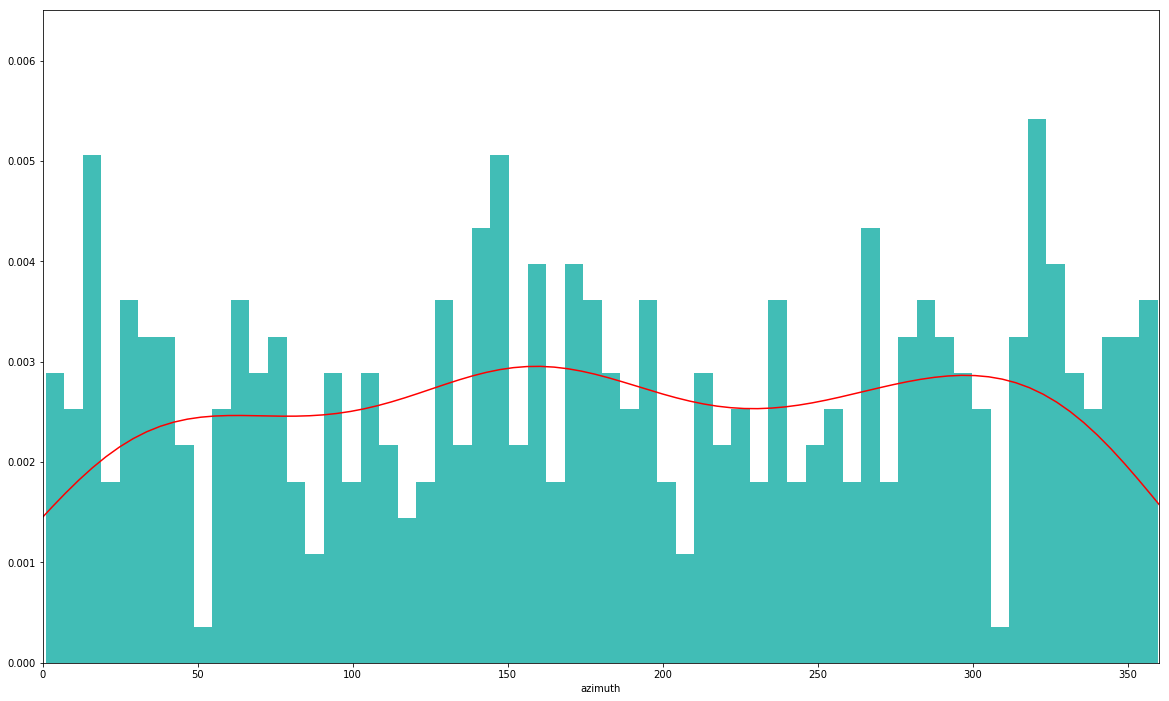

In [33]:
# Histogram projection and curve approximation
fig, ax = plt.subplots()

n, bins, patches = ax.hist(pics["azimuth"], 60, density=True, histtype='stepfilled', facecolor='lightseagreen', alpha=0.85)
sns.distplot(pics["azimuth"], color='r', hist=False, kde=True)

## setting the limits on the x-axis and y-axis
plt.xlim(0,360)
plt.ylim(0,0.0065)

fig.set_size_inches(20, 12)
plt.show()

##### Histogram 0 -> π

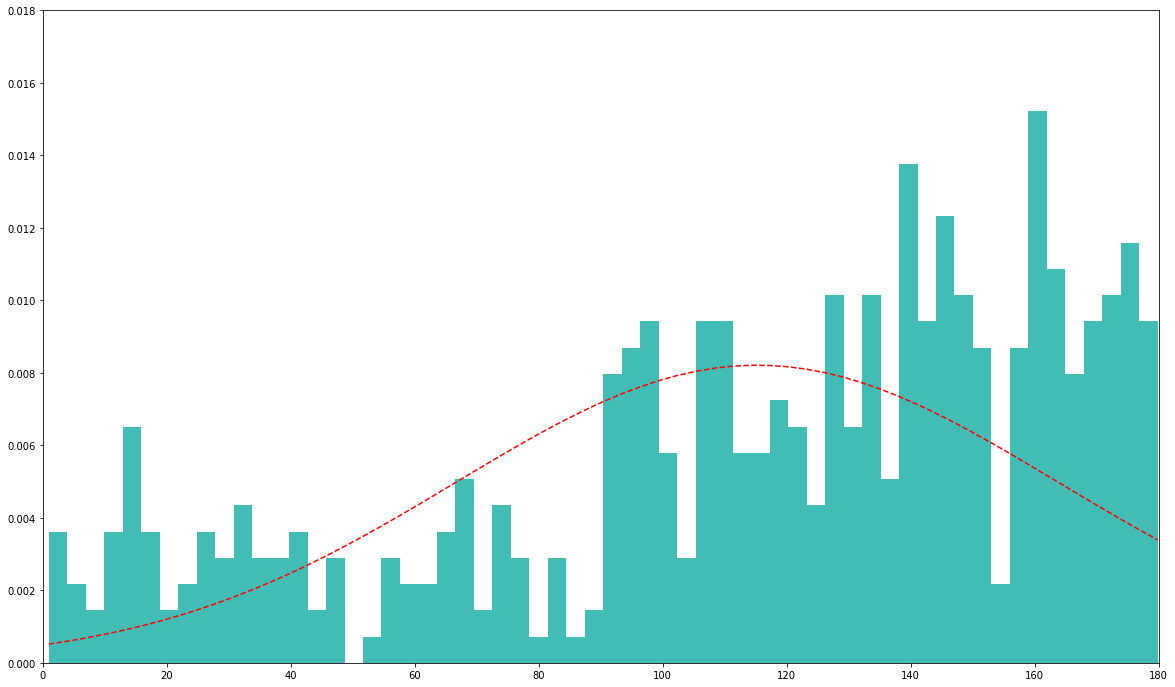

In [34]:
# Reprojection between 0 - π
pics180 = azimuth_distribution180(pics["azimuth"])

# Descriptive calculation
mu_p = np.mean(pics180)  # mean of distribution
sigma_p = np.std(pics180)  # standard deviation of distribution
median_p = np.median(pics180)  # median of distribution

# Plot
fig, ax = plt.subplots()

n, bins_p, patches = ax.hist(pics180, 60, density=True, histtype='stepfilled', facecolor='lightseagreen', alpha=0.85)

# add a 'best fit' line
y_p = ((1 / (np.sqrt(2 * np.pi) * sigma_p)) *
     np.exp(-0.5 * (1 / sigma_p * (bins_p - mu_p))**2))
ax.plot(bins_p, y_p, '--',  color='r')

## setting the limits on the x-axis and y-axis
plt.xlim(0,180)
plt.ylim(0,0.018)
fig.set_size_inches(20, 12)

plt.show()

### Descriptive calculation

##### From 0 -> π

In [35]:
# Create Table
pics_descrip = pd.DataFrame({'Flickr : 0 - π distribution':[mu_p, sigma_p, median_p]},
                       index = ['Mean', 'Variance', 'standard deviation'])
pics_descrip

,Flickr : 0 - π distribution
Mean,115.231953
Variance,48.581001
standard deviation,127.690987


##### Polar description

In [36]:
sum_cos_p = c_cal(pics["azimuth"])
sum_sin_p = s_cal(pics["azimuth"])

mean_p = mean_polar(sum_cos_p,sum_sin_p)
r_bar_p = r_bar_cal(sum_cos_p,sum_sin_p, len(pics["azimuth"]))

cvar_p = cvar_polar(r_bar_p)
avar_p = avar_polar(r_bar_p)
csd_p = csd_polar(r_bar_p)
ad_p = ad_polar(r_bar_p)

# Create Table
pics_descrip_polar = pd.DataFrame({'FlickR : Polar description':[mean_p, r_bar_p, cvar_p, avar_p, csd_p, ad_p]},
                       index = ['Mean', 'R_bar', 'Circular Variance', 'Angular Variance', 'Circular Standard Deviation', 'Angular Deviation'])
pics_descrip_polar

,FlickR : Polar description
Mean,324.950473
R_bar,0.028443
Circular Variance,0.971557
Angular Variance,1.943115
Circular Standard Deviation,152.881299
Angular Deviation,79.867823


##### Significance Test : Rayleigh

In [37]:
# Calculation of Rayleigh R
def r_rayleigh(n,r) :
    return n*r

# Calculation of Rayleigh z score
def zscore_rayleigh(n,R) :
    return np.power(R, 2)/n

In [38]:
rayleigh_val = r_rayleigh(r_bar_p, len(pics["azimuth"]))
rayleigh_zsco = zscore_rayleigh(len(pics["azimuth"]), rayleigh_val)

print(len(pics["azimuth"]))
# Create Table
pics_descrip_polar = pd.DataFrame({'FlickR : Rayleigh test':[rayleigh_val, rayleigh_zsco]},
                       index = ['Rayleigh R', 'Rayleigh z score'])
pics_descrip_polar

463


,FlickR : Rayleigh test
Rayleigh R,13.16896
Rayleigh z score,0.37456
